#  Déterminants de la durée du trajet dans le système Ford GoBike
## Par Patrick Mballa

## Aperçu de l'enquête


> Ce travail propose d'étudier les déterminants de la durée de trajet afin de prédire les trajets les plus longs. Un accent particulier a été mis sur le jour de la semaine où le trajet est effectué, sur le type d'utilisateur et le genre.


## Aperçu de l'ensemble des données

> L'ensemble de données traité comprend 183412 trajets individuels avec 16 caractéristiques pour chacun de ces trajets. Tel que l'ensemble des données est transmis, 9 caractéristiques des trajets sont numériques et les autres caractéristiques sont des données qualitatives. Cependant, il nous avons quelque peu modifié cet ensemble de donné en supprimant les lignes avec des données manquantes, en remplaçant les années de naissance par les âges, en crééant de nouvelles colonnes (jour de la semaine par exemple) etc. A la fin de ce traitement, on a obtenu et utilisé un ensemble de données ayant 174952 lignes et 22 colonnes. Parmi ces colonnes, 6 sont de type numérique/quantitatif, 10 sont de type qualitatif nominal, 4 sont de type qualitatif ordinale (les mois et les jours de la semaine), le deux autres sont de type datetime.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('bike.csv')
bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_gender,bike_share_for_all_trip,start_month,start_day_of_week,start_hour,end_month,end_day_of_week,end_hour,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,Male,No,febuary,thursday,17:32:10.145000,march,friday,08:01:55.975000,35.0
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,Male,No,febuary,thursday,12:13:13.218000,march,friday,05:24:08.146000,47.0


In [3]:
# Changement en type Category des jours de la semaine et vérification
ordinal_var_dict = {'start_day_of_week': ['monday','tuesday','wednesday','thursday','friday','saturday', 'sunday'],
                    'end_day_of_week': ['monday','tuesday','wednesday','thursday','friday','saturday', 'sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike[var] = bike[var].astype(ordered_var)
bike.dtypes

duration_sec                  int64
start_time                   object
end_time                     object
start_station_id            float64
start_station_name           object
start_station_latitude      float64
start_station_longitude     float64
end_station_id              float64
end_station_name             object
end_station_latitude        float64
end_station_longitude       float64
bike_id                       int64
user_type                    object
member_gender                object
bike_share_for_all_trip      object
start_month                  object
start_day_of_week          category
start_hour                   object
end_month                    object
end_day_of_week            category
end_hour                     object
age                         float64
dtype: object

## Distribution de la durée en secondes du trajet

> La durée des trajets est principalement concentrée sur la partie gauche. La plupart des trajets ont une durée inférieure à 2000 secondes avec un pic autour de 700 secondes. En fonction de la durée en secondes, le nombres de trajets est d'abord croissant de 8000 trajets environs jusqu'à environ 12000 trajets. Ensuite, l'on assiste à une décroissance (à partir d'environ 700 secondes) jusqu'à moins de 500 trajets.


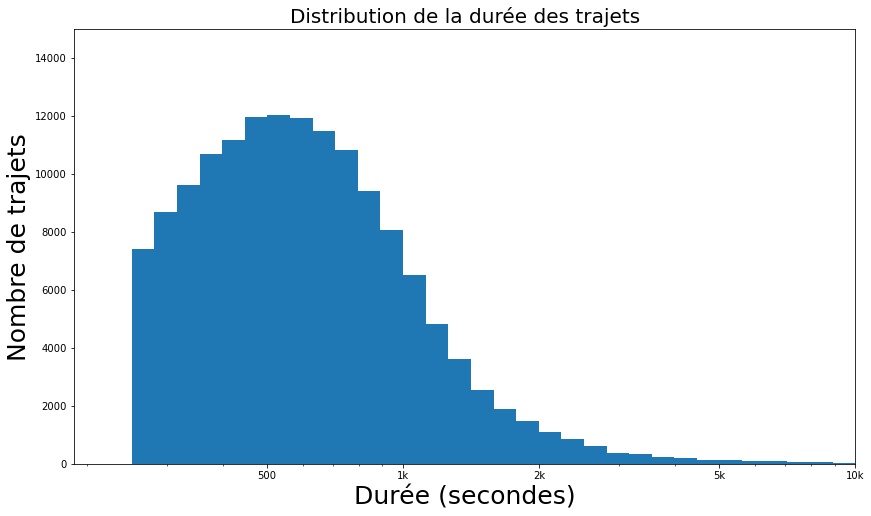

In [4]:
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(bike.duration_sec.max()) + log_binsize, log_binsize)

plt.figure(figsize=[14, 8])
plt.hist(data = bike, x = 'duration_sec', bins = log_bins)
plt.title('Distribution de la durée des trajets', fontsize=20)
plt.xlabel('Durée (secondes)', fontsize=25)
plt.ylabel('Nombre de trajets', fontsize=25)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

## Rapport entre durée du trajet et type d'utilisateur

> Le pourcentage de clients qui effectuent des trajets de plus longue durée est supérieure au pourcentage d'abonnés qui effectuent des trajets de plus longue durée. 

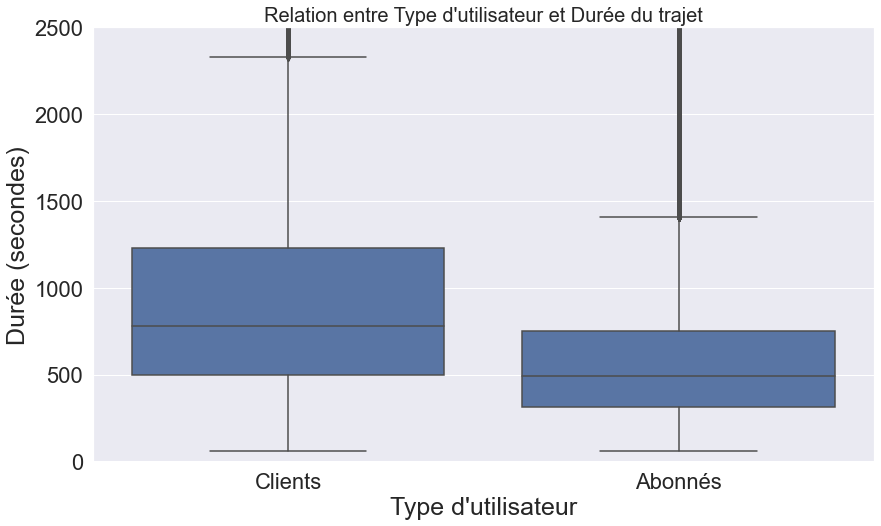

In [9]:
def moustache(data,x,y,xlabel,ylabel,r):
    base_color = sb.color_palette()[0]
    g1 = sb.boxplot(data = data, x = x, y =y, color = base_color)
    g1.set(xticklabels=["Clients", "Abonnés"])
    plt.title("Relation entre Type d'utilisateur et Durée du trajet", fontsize=20)
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)
    plt.ylim([-5, 2500])
    plt.xticks(rotation=r)
    sb.set(font_scale=2)
plt.figure(figsize=[14,8])  
moustache(bike, "user_type", "duration_sec", "Type d'utilisateur", "Durée (secondes)", 0)

## Rapport entre durée du trajet, le jour de la semaine et le type d'utilisateur.

> Les clients font des trajets de plus longue durée que les abonnées,  cela indépendament du jour de la semaine. Par ailleurs, Les clients du week-end font des trajets de plus longue durée que tous les autres utilisateurs. 

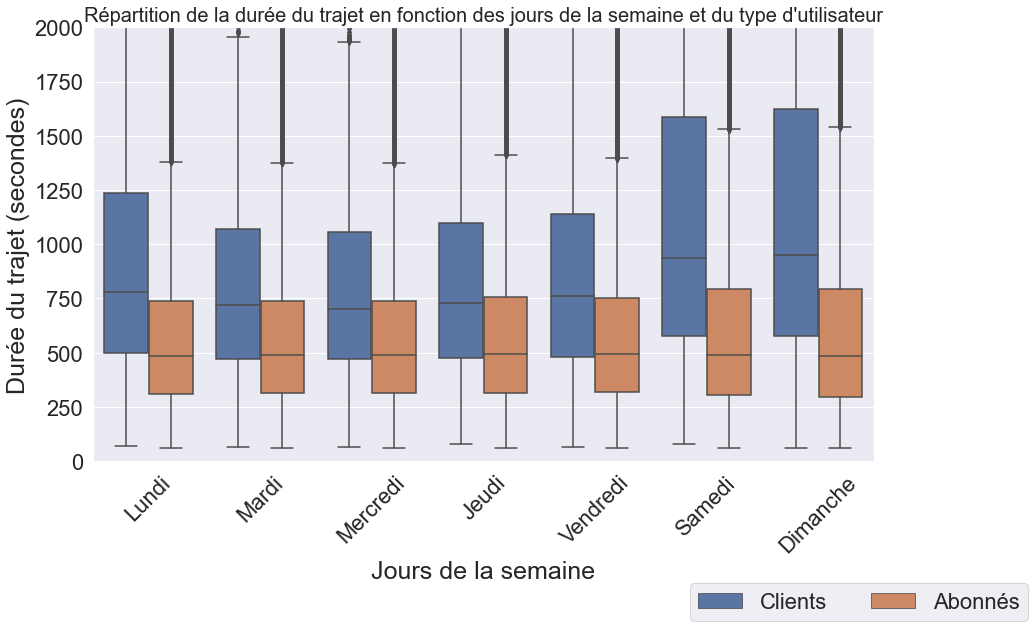

In [6]:
plt.figure(figsize=[14,8])
g2=sb.boxplot(data=bike, x="start_day_of_week", y="duration_sec", hue=bike['user_type'].replace(["Customer","Subscriber"],["Clients","Abonnés"]))
g2.set(xticklabels=["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"])
plt.xticks(rotation=45)
plt.ylim([-5, 2000])
plt.xlabel("Jours de la semaine", fontsize=25)
plt.ylabel("Durée du trajet (secondes)", fontsize=25)
plt.legend(loc=3, bbox_to_anchor=(0.75, -0.39),ncol=2)
plt.title("Répartition de la durée du trajet en fonction des jours de la semaine et du type d'utilisateur", fontsize=20)
sb.set(font_scale=2);

## Répartition de la durée moyenne en fonction du genre et du type d'utilsateur

>Le classement en ordre décroissant de la durée moyenne du trajet par genre et par type d'utilisateur est le suivant: 
les clients du genre autre (environ 1603 secondes); les clients femmes ( environ 1425 secondes); les clients hommes (environ 1254 secondes); les abonnés du genre autre (environ 913 secondes); les abonnés femmes (environ 697 secondes) et enfin les abonnés hommes (environ 617 secondes)

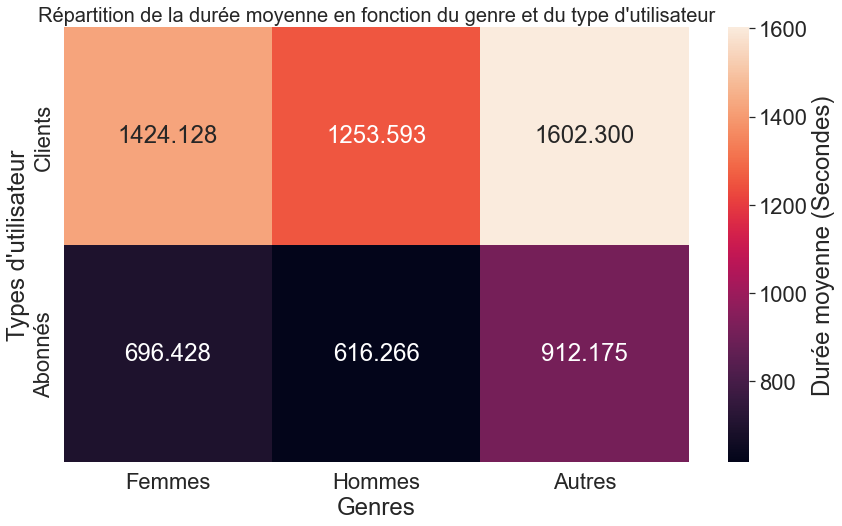

In [7]:
plt.figure(figsize=[14,8])
cat_means = bike.groupby(['member_gender', 'user_type']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_mean')
cat_means = cat_means.pivot(index = 'user_type', columns = 'member_gender',
values = 'duration_mean')
#plt.title("Répartition de la durée moyenne en fonction du genre et du type d'utilisateur", fontsize=18)
heatmap = sb.heatmap(cat_means, annot = True, fmt = '.3f', xticklabels=["Femmes","Hommes", "Autres"], 
                     yticklabels=["Clients","Abonnés"],cbar_kws = {'label' : 'Durée moyenne (Secondes)'})
plt.title("Répartition de la durée moyenne en fonction du genre et du type d'utilisateur", fontsize=20)
plt.xlabel('Genres')
plt.ylabel("Types d'utilisateur")
sb.set(font_scale=2);

In [10]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_Patrick.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_Patrick.ipynb to slides
[NbConvertApp] Writing 833185 bytes to Part_II_slide_deck_Patrick.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File 